In [1]:
using Plots
using LinearAlgebra
using STMO
import STMO.Quadratic: plot_quadratic, fquad

┌ Info: Precompiling STMO [3ace5234-8ecc-46a3-bb23-1fccb8667e7a]
└ @ Base loading.jl:1278


# Motivation

Quadratic systems are essential! Firstly, we can often closely approximate systems close to their maximum by a quadratic system. Studying the minimization of quadratic systems can teach us about the minimization of general convex functions. Quadratic systems are also crucial in their own right! Many statistical models, graph problems, molecular models, etc. can be formulated as quadratic systems:

- least-square minimization problems
- inference using multivariate normal distributions
- molecular modeling using spring-mass systems
- signal recovery

# Warming up: one-dimensional quadratic systems

In the scalar case, a quadratic function is given by

$$
f(x) = \frac{1}{2}px^2+qx +r\,,
$$

with $p>0$ (we will shortly see why).

Our optimization problem is given by:

$$
\min_x\,\frac{1}{2}px^2+qx +r\,.
$$

This can easily be solved by setting the first order derivative equal to zero:

$$
\frac{\mathrm{d}f(x)}{\mathrm{d}x} = px + q
$$
$$
px^\star+q = 0 \Leftrightarrow x^\star=\frac{-q}{p}\,.
$$

To show that this is the sole minimizer of $f(x)$, we have to prove that the second-order derivative is positive at this point. This means that at that point, the derivative of the function is increasing: a little to the left the function is increasing, a little to the right and the function is decreasing. We have
$$
\left.\frac{\mathrm{d}^2f(x)}{\mathrm{d}x^2}\right|_{x^\star} = p\,,
$$
so if $p>0$ then $x^\star$ is the minimizer of $f(x)$.


**Assignment 1**
Complete the code for solving the 1-D quadratic system. Use it to find the minimum of
$$
4x^2+8x + 2\,.
$$
Check the solution graphically.

In [2]:
"""
    solve_quadratic(p::Real, q::Real, r::Real=0.0)

Finds the minimizer of a 1-D quadratic system,
raises an error if there is no minimizer (p<0)

Inputs:
    - p, q, r: the coefficients of the 1D quadratic system

Output:
    - xstar: the minimizer
"""
function solve_quadratic(p::Real, q::Real, r::Real=0.0)
    @assert p > 0 
    return xstar = - q/p
end

solve_quadratic

In [7]:
p = 4*2
q = 8
r = 2

# solve the system
xstar=solve_quadratic(p,q,r)

-1.0

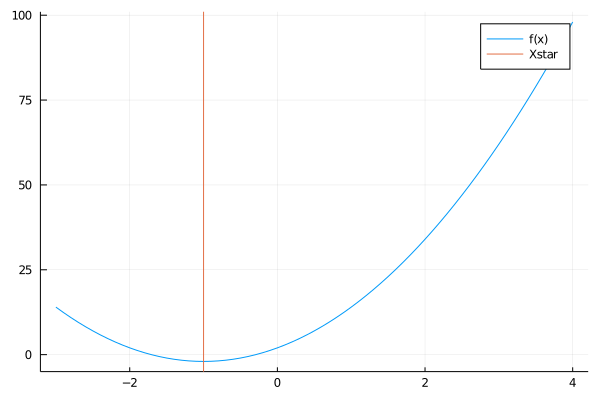

In [8]:
# plot the system and the solution
f(x) = 4x^2 + 8x + 2

plot(f,-3:0.1:4, label = "f(x)")
vline!([xstar], label="Xstar")

# Towards $n$-dimensional quadratic systems

Let us directly move from the one-dimensional case to the $n$-dimensional case. We will use vector notation:
$$
\mathbf{x} = \begin{bmatrix}
       x_1 \\ \vdots \\ x_n
     \end{bmatrix} \in \mathbb{R}^n\,.
$$
A general $n$-dimensional linear system is given by:
$$
f(\mathbf{x}) =\frac{1}{2} \mathbf{x}^\top P \mathbf{x} + \mathbf{q}^\top\mathbf{x} + r\,,
$$
with $P$ an $n\times n$ symmetric matrix, $\mathbf{q}$ an $n$-dimensional vector and $r$ a scalar. Below, the contours of a two-dimensional example are shown.

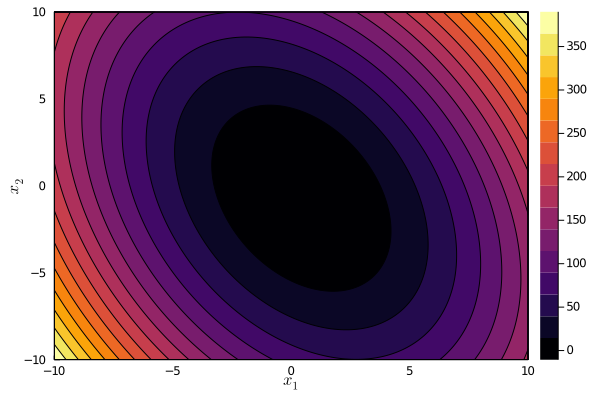

In [9]:
P = [4 1; 1 2]
q = [-1; 1]
r = -10

plot_quadratic(P, q, r, (-10, 10), (-10, 10), fill=true)

**Question 1**
Why is $P$ symmetric? => look at notes (doesn't have to be symmetric but is usefull)

So we want to solve the problem:
$$
\min_\mathbf{x}\,\frac{1}{2}\mathbf{x}^\top P \mathbf{x} + \mathbf{q}^\top\mathbf{x} + r\,.
$$

The concept of a derivative is extended towards higher dimensions using the *gradient* operator:
$$
\nabla_\mathbf{x} = \begin{bmatrix}
       \frac{\partial \, }{\partial x_1} \\ \vdots \\ \frac{\partial \, }{\partial x_n}
     \end{bmatrix}\,,
$$
so that the gradient of $f(\mathbf{x})$ is given by:
$$
\nabla_\mathbf{x} f(\mathbf{x}) = \begin{bmatrix}
       \frac{\partial f(\mathbf{x}) }{\partial x_1} \\ \vdots \\ \frac{\partial f(\mathbf{x}) }{\partial x_n}
     \end{bmatrix}\,.
$$
From now on, we will drop the subscript in the gradient when clear from context. For those not familiar to vector calculus, the most useful rules are given below. Here, $a, b$ and $c$ are scalars, $f$ and $g$ are arbitrary differentiable functions and $\mathbf{b}$ is a vector.

| rule | example                  |
| :------------- | :------------- |
| linearity      | $\nabla_\mathbf{x}(a f(\mathbf{x}) +b g(\mathbf{x})) = a\nabla_\mathbf{x} f(\mathbf{x}) +b\nabla_\mathbf{x} g(\mathbf{x})$       |
| product rule | $\nabla_\mathbf{x}(f(\mathbf{x}) g(\mathbf{x})) = g(\mathbf{x})\nabla_\mathbf{x} f(\mathbf{x}) + f(\mathbf{x})\nabla_\mathbf{x} g(\mathbf{x})$|
|chain rule | $\nabla_{\mathbf{x}} f(g(\mathbf{x})) = \frac{\partial f}{\partial g}\mid_{g(\mathbf{x})} \nabla_\mathbf{x} f(\mathbf{x})$|
| quadratic term | $\nabla_\mathbf{x} \left(\frac{1}{2}\mathbf{x}^\top A\mathbf{x}\right)= A\mathbf{x}$|
|linear term| $\nabla_\mathbf{x} (\mathbf{b}^\top\mathbf{x})=\mathbf{b}$|
|constant term |$\nabla_\mathbf{x} c = 0$ |

w

The gradient of the quadratic function is
$$
\nabla f(\mathbf{x})=P\mathbf{x} +\mathbf{q}\,.
$$
Setting this to zero gives
$$
\mathbf{x}^\star=-P^{-1}\mathbf{q}\,.
$$

> *Even though the solution contains the inverse of a matrix, it is seldom a good idea to compute a matrix inverse. Instead, use a solver for the linear system $A\mathbf{x}=\mathbf{b}$ (numerically stable).*

How do we know that $\mathbf{x}^\star$ is the minimizer of the quadratic system? For this we have to extend the concept of a second order derivative to $n$ dimensions. We define the *Hessian* as:
$$
\nabla^2 f(\mathbf{x}) = \begin{bmatrix}
\frac{\partial^2 f(\mathbf{x})}{\partial {x_{1}^2}} & \frac{\partial^2 f(\mathbf{x})}{\partial x_1 x_2} & \ldots &  \frac{\partial^2 f(\mathbf{x})}{\partial x_1 x_n}\\
\frac{\partial^2 f(\mathbf{x})}{\partial x_1 x_2} & \frac{\partial^2 f(\mathbf{x})}{\partial {x_2}^2} & \ldots & \vdots \\
\vdots & \vdots & \ddots & \vdots \\
\frac{\partial^2 f(\mathbf{x})}{\partial x_1 x_n} & \frac{\partial^2 f(\mathbf{x})}{\partial x_2 x_n} & \ldots & \frac{\partial^2 f(\mathbf{x})}{\partial x_n^2}
\end{bmatrix}\,.
$$
For the quadratic system, this boils down to
$$
\nabla^2 f(\mathbf{x}) = P\,.
$$
The condition for $\mathbf{x}^\star$ to be the minimizer of $f(\mathbf{x})$ is that the Hessian should be *positive-definite* in that point.

> A symmetric $n\times n$ matrix $A$ is positive-definite (in symbols: $A\succ0$), if for any vector $\mathbf{z}\in\mathbb{R}^n$
> $$
> \mathbf{z}^\top A \mathbf{z} > 0\,.
> $$

A matrix is positive-definite if (and only if) all its eigenvalues as positive. In Julia, we can easily check whether a matrix is positive-define using `isposdef`:

In [10]:
using LinearAlgebra

A = [5 -1; -1 2]
isposdef(A)  # true


true

In [11]:
B = [0.5 3; 3 1]
isposdef(B)  # false


false

However, this is an expensive operation (it is based on attempting a Cholesky decomposition), so one should avoid performing unnecessary checks for positive definiteness.

A point $\mathbf{x}^\star$ at which the gradient vanishes is a minimizer if and only if
$$
\nabla^2 f(\mathbf{x})|_{\mathbf{x}^\star} \succ 0\,.
$$

So, for the quadratic problem, $x^\star$ is the unique minimizer iff $P\succ 0$. This means that along every direction $\mathbf{v}\in \mathbb{R}^n$ to project $\mathbf{x}$, the problem reduces to a one-dimensional quadratic function with a positive second-order constant:
$$
x_v = \mathbf{v}^\top \mathbf{x}\\
f'(x_v) = \frac{1}{2}x_v (\mathbf{v}^\top P \mathbf{v}) x_v + (\mathbf{v}^\top \mathbf{q})x_v + r\,,
$$
where $\mathbf{v}^\top P \mathbf{v}>0$ if $P\succ 0$, which in turn implies that $f'(x_v)$ has a minimizer.

If $P\succ 0$, the quadratic system is a *convex* function with a single minimizer. In many problems, $P$ is positive-definite, so there is a well-defined solution. We will develop this further in Chapter 2.

**Assignment 2**

Complete the code for solving the $n$-D quadratic system. Use it to find the minimum of
$$
f(\mathbf{x}) = \mathbf{x}^\top\begin{bmatrix}4 & 1 \\ 1 & 2\end{bmatrix}\mathbf{x} + \begin{bmatrix}3 \\ 1\end{bmatrix}^\top\mathbf{x} + 12\,.
$$

In [12]:
"""
    solve_quadratic(P::AbstractMatrix, q::AbstractVector, r::Real=0)

Finds the minimizer of an N-D quadratic system.
P is assumed to be a symmetric and positive-definite matrix.

Inputs:
    - P, q, r: the terms of the nD quadratic system

Output:
    - xstar: the minimizer, an (n x 1) vector
"""
function solve_quadratic(P::AbstractMatrix, q::AbstractVector, r::Real=0.0)
    return xstar = -P\ q
end

solve_quadratic

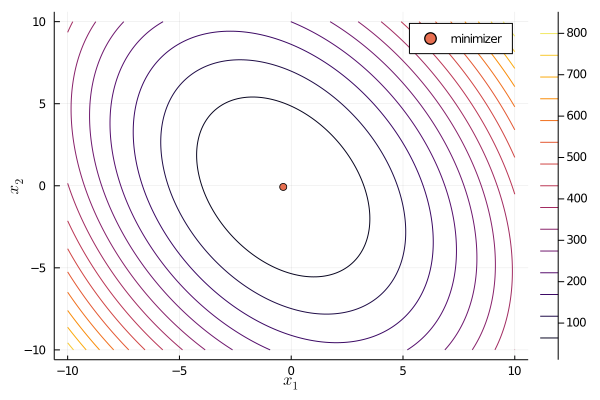

In [15]:
P = [4 1 ; 1 2] * 2
q = [3;1]
r = 12
# compute the minimizer
xstar = solve_quadratic(P,q,r)

plot_quadratic(P,q,r, (-10,10), (-10,10), fill=false)
xstar1, xstar2 = xstar
scatter!([xstar1], [xstar2], color=myred, label="minimizer")

**Question 2**

Consider $L_2$ regularized ridge regression:
$$
\min_\mathbf{x}\, \frac{1}{2}(\mathbf{y} - B\mathbf{x})^\top(\mathbf{y} - B\mathbf{x}) + \frac{c}{2}\cdot \mathbf{x}^\top\mathbf{x}\,,
$$
with $c>0$. Write this in the standard form of a quadratic system and show that it is convex. Give the expression for the minimizer. => check the notes on ipad

# Time and memory complexity of the exact solution

The exact solution for a convex quadratic system hinges on solving a $n\times n$ linear system. Conventional solvers for linear systems have a time complexity of $\mathcal{O}(n^3)$. Solving such systems is doable for problems of moderate size ($n<10000$), but becomes infeasible for large-scale problems (on a standard computer).

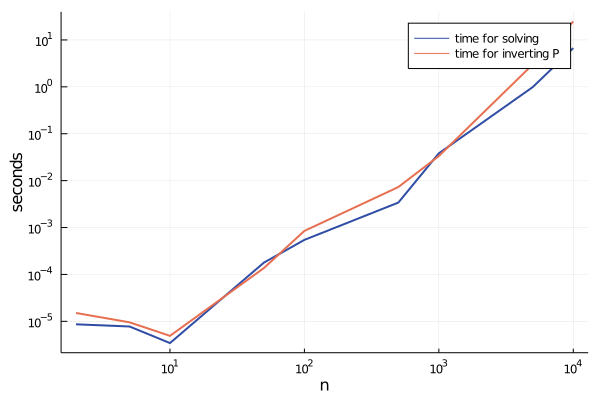

In [14]:
solvetime = Float64[]
invtime = Float64[]
sizes = [2, 5, 10, 50, 100, 500, 1000, 5000, 10000]

P = randn(2, 2)
q = randn(2)

# warmup
@elapsed(P \ q)
@elapsed(inv(P) * q)

for n in sizes
    P = randn(n, n) |> x -> x' * x + I
    q = randn(n)
    push!(solvetime, @elapsed(P \ q))
    push!(invtime, @elapsed(inv(P) * q))
end

plot(sizes, solvetime, color=myblue, label="time for solving", lw=2, xscale=:log10,
                            yscale=:log10)
plot!(sizes, invtime, color=myred, label="time for inverting P", lw=2)
xlabel!("n")
ylabel!("seconds")

Storing an $n\times n$ matrix also has a memory requirement of $\mathcal{O}(n^2)$. When $n$ is too large, this cannot fit in main memory. In the remainder of this chapter, we will consider the case when $P$ is too large to work with, while matrix-vector products $P\mathbf{x}$ *can* be computed. Some examples of when such settings occur:

- **low-rank**: $P=B^\top B$, with $B\in \mathbb{R}^{n\times p}$, with $p\ll n$.
- **sparse**: $P$ is a very sparse matrix.
- **structured**: $P$ has a special structure so that $P\mathbf{x}$ can be computed on the fly, e.g. $P_{ij}=i^2j^3$.
- **block**: $P$ is a sparse block matrix (blocks can be loaded and processed independently).

# Descent methods

Instead of computing the solution of a convex quadratic system in one step, we will use *descent methods*. Here, a minimizing sequence $\mathbf{x}^{(k)},\, k=1,\dots$, where
$$
\mathbf{x}^{(k+1)} = \mathbf{x}^{(k)} +t^{(k)}\Delta \mathbf{x}^{(k)}\,,
$$
with $t^{(k)}\geq 0$ called the *step size* (in machine learning often called *learning rate*) and $\Delta \mathbf{x}^{(k)}$ called the *search direction*. Proper descent methods have that
$$
f(\mathbf{x}^{(k+1)}) < f(\mathbf{x}^{(k)})\,,
$$
except when $\mathbf{x}^{(k)}$ is optimal. For this property to hold, the search direction should satisfy
$$
(\Delta \mathbf{x}^{(k)})^\top \nabla f(\mathbf{x}) < 0\,.
$$

![Descent and ascent step.](Figures/descent_step.png)

## General descent algorithm

Below is the general pseudocode of a general descent method:

> **given** a starting point $\mathbf{x}$
>
> **repeat**
>> 1. Determine descent direction $\Delta \mathbf{x}$
>> 2. *Line search*. Choose $t>0$.
>> 3. *Update*. $\mathbf{x}:=\mathbf{x} + t \Delta \mathbf{x}$.
>
> **until** stopping criterion is reached.
>
> **Output**: $\mathbf{x}$

Usually, the convergence criterion is of the form
$$
||\nabla f(\mathbf{x})|| < \nu\,.
$$

The step size can be chosen in several ways:

- **exact**: $t=\arg\min_{s\geq 0}\, f(\mathbf{x}+s\Delta \mathbf{x})$.
- **approximate**: choose a $t$ that only approximately minimizes $f(\mathbf{x}+s\Delta \mathbf{x})$.
- **decaying**: choose some decaying series, e.g. $t = \frac{1}{\alpha+k}$.
- **constant**: a constant step size (often works fine in practice).

For quadratic systems we can compute the exact step size, as this amounts to a simple one-dimensional quadratic problem:
$$
t=\arg\min_{s\geq 0}\, \frac{1}{2}(\mathbf{x}+s\Delta \mathbf{x})^\top P (\mathbf{x}+s\Delta \mathbf{x}) + (\mathbf{x}+s\Delta \mathbf{x})^\top \mathbf{q} + r
$$
$$
 =\arg\min_{s\geq 0}\, \frac{1}{2}s^2(\Delta\mathbf{x})^\top P \Delta\mathbf{x} + s((\Delta \mathbf{x})^\top P\mathbf{x}+(\Delta \mathbf{x})^\top\mathbf{q}) +\text{constant}
$$

This can be solved as:

$$
t = \frac{-(\Delta\mathbf{x})^\top P \mathbf{x}-(\Delta\mathbf{x})^\top\mathbf{q}}{(\Delta\mathbf{x})^\top P \Delta\mathbf{x}}
$$

**Assignment 3**

Complete the code for the exact line search for quadratic systems.

In [16]:
"""
    quadratic_ls(P::AbstractMatrix, q::AbstractVector, Δx::AbstractVector,
                                    x::AbstractVector)

Find the exact step size that minimized a quadratic system in
a given point x for a given search direction Dx

Inputs:
    - P, q: the terms of the nD quadratic system
    - x: starting point
    - Δx: search direction

Output:
    - t: optimal step size
"""
function quadratic_ls(P::AbstractMatrix, q::AbstractVector, Δx::AbstractVector,
                                    x::AbstractVector)
    t = (-(Δx')*P*x-(Δx')*q)/(Δx'*P*Δx)  # compute t
    return t
end

quadratic_ls

# Gradient descent

A natural choice for the search direction is the negative gradient:
$$
\Delta \mathbf{x} = - \nabla f(\mathbf{x})\,.
$$
Remember, for the quadratic system, the gradient was
$$
\nabla f(\mathbf{x})=P\mathbf{x} + \mathbf{q}\,,
$$
so
$$
\Delta \mathbf{x} = - P\mathbf{x} - \mathbf{q}\,.
$$

## Gradient descent algorithm for quadratic systems

> **given** a starting point $\mathbf{x}$
>
> **repeat**
>> 1. *Descent direction*. $\Delta \mathbf{x} := - P\mathbf{x} - \mathbf{q}$
>> 2. *Line search*. Choose optimal $t>0$.
>> 3. *Update*. $\mathbf{x}:=\mathbf{x} + t \Delta \mathbf{x}$.
>
> **until** stopping criterion is reached.

**Assignment 4**

Complete the code for the gradient descent algorithm. Solve the previous quadratic system and compare it with the analytic solution. Start at $\mathbf{x}^{(0)}=[0,0]^\top$. How many steps do you need for the algorithm to converge? You can access this information from a `Tracker` structure using the function `length`.

In [17]:
"""
    gradient_descent(P::AbstractArray, q::AbstractVector,
            x₀::AbstractVector; ϵ::Real=1e-6,
            tracker::Tracker=notrack)

Computes the minimizes of a quadratic system using gradient descent. Optionally
provide momentum.

Inputs:
    - P, q: the terms of the nD quadratic system
    - x₀: starting point
    - ϵ: convergence parameter
    - tracker: object of the type `Tracker` to save the steps

Outputs:
    - xstar: the found minimum
"""
function gradient_descent(P::AbstractArray, q::AbstractVector,x₀::AbstractVector; ϵ::Real=1e-4, trace=false)

    x = x₀  # initial value
    n_steps = 0
    while true
        n_steps= n_steps+1
        Dx = -P*x-q # compute GD direction
        if norm(Dx) < ϵ
            break
        end
        t = quadratic_ls(P, q, Dx, x)# step size
        x = x + t*Dx # perform step
        #trace(tracker, x)
    end
    print(n_steps)
    return x 
end

gradient_descent

In [18]:
# solve the quadratic system using gradient descent
P = [4 1 ; 1 2] * 2
q = [3;1]
r = 12
@time gradient_descent(P, q, [0,0])

6  0.755054 seconds (1.86 M allocations: 91.310 MiB)


2-element Array{Float64,1}:
 -0.3571423330672427
 -0.07142993402516903

## Illustration

We illustrate the gradient descent algorithm for the following system:
$$
\min_{x_1,x_2}\, \frac{1}{2} (x_1^2 + \gamma x_2^2)\,
$$
with $\gamma$ set to 10.

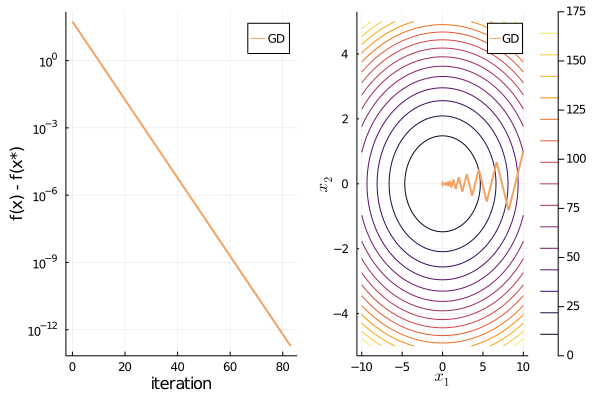

In [19]:
#using STMO: plotobj, fquad, plot_quadratic
#using STMO: PathTrack

P = [1 0; 0 10]
q = [0, 0]
r = 0
x₀ = [10.0, 1.0]

gdtracker = PathTrack(x₀)

xstar = Quadratic.gradient_descent(P, q, copy(x₀), tracker=gdtracker)

p1 = plotobj(x -> fquad(x, P, q, r), gdtracker, yscale=:log10, label="GD",
    ylabel="f(x) - f(x*)");
p2 = plot_quadratic(P, q, r, (-10, 10), (-5, 5));
path!(gdtracker, label="GD");
plot(p1, p2)

## Convergence analysis

We can study the convergence of the gradient descent algorithm by using eigenvalue decomposition. The matrix $P$ can be written as:
$$
P = U\Lambda U^\top\,,
$$

with

-  $\Lambda=\text{diag}(\lambda_1,\ldots,\lambda_n)$ a matrix with the eigenvalues on the diagonal (sorted from small to large);
-  $U = [\mathbf{u}_1, \ldots, \mathbf{u}_n]$, a matrix with the corresponding eigenvectors.

Note that because $P\succ 0$, all eigenvalues are real and positive, and all eigenvectors form a real orthonormal basis.

Consider the following linear transformation:
$$
\mathbf{z}^{(k)}= U^\top ( \mathbf{x}^{\star}-\mathbf{x}^{(k)})\,,
$$

which allows us to rewrite the error in closed-form:

$$
f(\mathbf{x}^{(k)}) - f(\mathbf{x}^\star) = \frac{1}{2}\sum_{i=1}^n (1-t\lambda_i)^{2k}\lambda_i[(\mathbf{u}_i)^\top(\mathbf{x}^{(0)}-\mathbf{x}^\star)]^2\,.
$$

Here, we see that:

1. The error decomposes in independent terms in the eigenspace.
2. The convergence of each term is determined by the *rate*: $|1-t\lambda_i|$. Convergence occurs as a geometric series.
3. The total number of steps until convergence is determined by either the smallest and largest eigenvalue.
4. Optimal value for fixed step size is $t=\frac{1}{\lambda_1+\lambda_n}$.

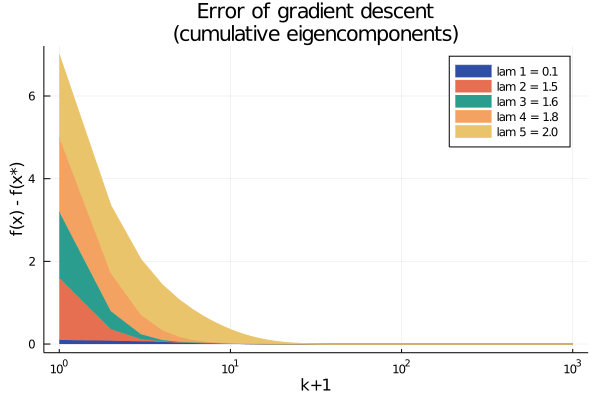

In [20]:
using Plots, STMO
λs = [0.1, 1.5, 1.6, 1.8, 2]

x₀ = ones(5)
t = 2 / (maximum(λs) + minimum(λs))
# error xstar = 0, x₀ = 1
errors = [(1.0 - t * λ)^(2k) * λ * x₀ᵢ^2 for k in 0:1000, (λ, x₀ᵢ) in zip(λs, x₀)]
cumerrors = cumsum(errors, dims=2)
plot(cumerrors[:,1], fillrange=0, xscale=:log10, color=myblue, fillcolor=myblue, label="lam 1 = $(λs[1])")
plot!(cumerrors[:,2], fillrange=cumerrors[:,1], color=myred, fillcolor=myred, label="lam 2 = $(λs[2])")
plot!(cumerrors[:,3], fillrange=cumerrors[:,2], color=mygreen, fillcolor=mygreen, label="lam 3 = $(λs[3])")
plot!(cumerrors[:,4], fillrange=cumerrors[:,3], color=myorange, fillcolor=myorange, label="lam 4 = $(λs[4])")
plot!(cumerrors[:,5], fillrange=cumerrors[:,4], color=myyellow, fillcolor=myyellow, label="lam 5 = $(λs[5])")
xlabel!("k+1")
ylabel!("f(x) - f(x*)")
title!("Error of gradient descent\n(cumulative eigencomponents)")

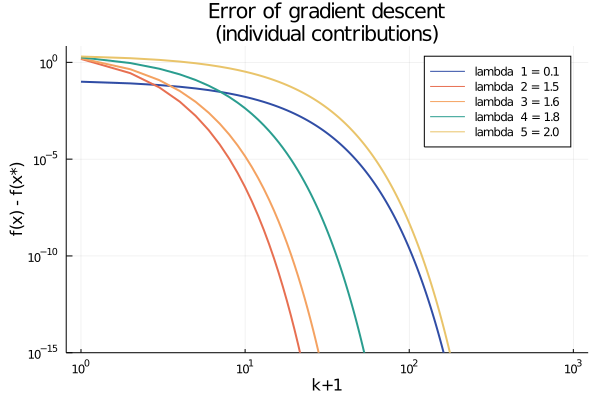

In [21]:
plot(errors, ylims=(1e-15,7), lw=2, xscale=:log10, yscale=:log10,
             color = [myblue myred myorange mygreen myyellow],
             label=[" lambda  $i = $(λs[i])" for j in 1:1, i in 1:5])
xlabel!("k+1")
ylabel!("f(x) - f(x*)")
title!("Error of gradient descent\n(individual contributions)")

Furthermore, it can be shown that if we use an exact line search for the step size, the error $f(\mathbf{x}^{(k)}) - f(\mathbf{x}^\star)\leq \epsilon$ we need fewer than
$$
\frac{\log((f(\mathbf{x}^{(0)}) - f(\mathbf{x}^\star))/\epsilon)}{\log(1/c)}\,,
$$
with $c=1-\frac{\lambda_1}{\lambda_n}<1$. The quantity $\kappa=\frac{\lambda_n}{\lambda_1}$ is called the *condition number* and largely determines the convergence. We observe:

- The quality of the initial guess $f(\mathbf{x}^{(k)}) - f(\mathbf{x}^\star$) has only a logarithmic impact on the number of steps required.
- Only a few extra steps are needed to decrease $\epsilon$ with one order of magnitude.
- If the condition number is large, then $\log(1/c)\approx 1/\kappa$. Large condition numbers require more steps.

Below, we illustrate this bound for different condition numbers.

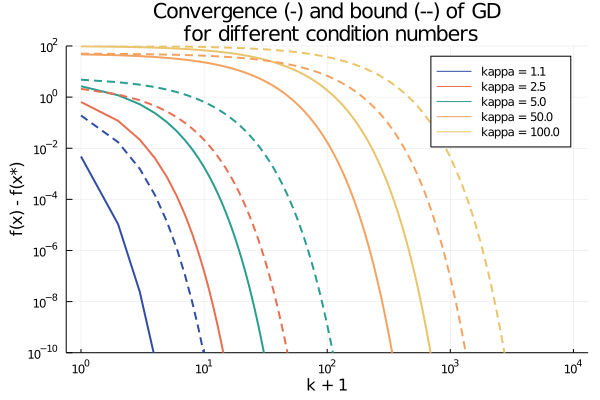

In [22]:
κs = [1.1, 2.5, 5, 50, 100]

bestt(κ) = 2 / (1 + κ)
errors = [(1 - bestt(κ))^(2k) + (1-bestt(κ) * κ)^(2k) * κ for k in 1:10000, κ in κs]

plot(errors, color = reshape(mycolors, 1, :),
        labels = [" kappa = $κ" for i in 1:1, κ in κs],
        xscale=:log10, yscale=:log10, ylims=(1e-10, 100), lw=2)

κ2c(κ) = 1 - 1 / κ
bounds = [exp(log(1+κ) - k * log(1/κ2c(κ))) for k in 1:10000, κ in κs]

plot!(bounds, lw=2, ls=:dash, color = reshape(mycolors, 1, :), label="")
ylabel!("f(x) - f(x*)")
xlabel!("k + 1")
title!("Convergence (-) and bound (--) of GD\n for different condition numbers")

# Gradient descent with momentum

> *While finding the gradient of an objective function is a splendid idea, [descending] the gradient directly may not be.* ~ David J.C. MacKay

Even on simple quadratic problems as discussed here, gradient descent often takes a surprisingly large number of steps to converge. This is because the gradient does not necessarily points in the general direction of the minimum. For convex problems, we are only guaranteed that the gradient points in the half-space of the minimum - a rather weak guarantee! Many improvements in gradient descent have been devised. We will briefly discuss a small modification that can lead to a substantial increase in performance.

## Steps with memory

$$
\Delta \mathbf{x}^{(k+1)} = \beta \Delta \mathbf{x}^{(k)} - (1-\beta)\nabla f(\mathbf{x}^{(k)})
$$
$$
\mathbf{x}^{(k+1)} = \mathbf{x}^{(k)} + t^{(k)}\Delta \mathbf{x}^{(k+1)}\,,
$$
with $\beta\in[0,1)$ called the *momentum parameter*.

## Gradient descent algorithm with momentum

> **given** a starting point $\mathbf{x}$,  $\beta\in[0,1)$
>
> **initialize** $\Delta \mathbf{x}= \mathbf{0}$
>
> **repeat**
>> 1. *Descent direction*. $\Delta \mathbf{x} := \beta \Delta \mathbf{x}- (1-\beta)(P\mathbf{x}+\mathbf{q})$
>> 2. *Line search*. Choose optimal $t>0$.
>> 3. *Update*. $\mathbf{x}:=\mathbf{x} + t \Delta \mathbf{x}$.
>
> **until** stopping criterion is reached.
>
> **Output** $\mathbf{x}$

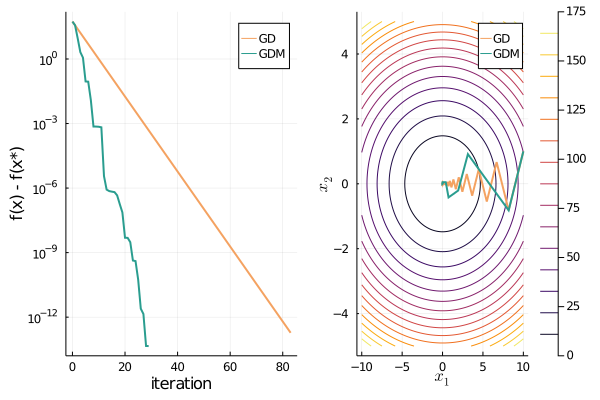

In [23]:
P = [1 0; 0 10]
q = [0, 0]
r = 0
x₀ = [10.0, 1.0]

# without momentum
gdtracker = PathTrack(x₀)
xstar = Quadratic.gradient_descent(P, q, copy(x₀), tracker=gdtracker)

# with momentum
gdmtracker = PathTrack(x₀)
xstar = Quadratic.gradient_descent(P, q, copy(x₀), β=0.4, tracker=gdmtracker)

p1 = plotobj(x -> fquad(x, P, q, r), gdtracker, yscale=:log10, label="GD",
    ylabel="f(x) - f(x*)");
plotobj!(x -> fquad(x, P, q, r), gdmtracker, label="GDM")
p2 = plot_quadratic(P, q, r, (-10, 10), (-5, 5));
path!(gdtracker, label="GD");
path!(gdmtracker, label="GDM", color=mygreen)
plot(p1, p2)

## Illustration of momentum

**Assignment 5**

1. Complete the code for gradient descent with momentum. Use it find the solution for the above system, also starting at $\mathbf{x}=[0,0]^\top$. Set $\beta=0.1$. Do you see an improvement?
2. Compare both algorithms for minimizing the following system:
$$
f(\mathbf{x}) = \frac{1}{2}\mathbf{x}^\top\begin{bmatrix}500 & 2 \\ 2 & 1\end{bmatrix}\mathbf{x} + \begin{bmatrix}-40 \\100 \end{bmatrix}^\top\mathbf{x} -5\,,
$$

at $\mathbf{x}_0= [0, 0]^\top$. Does momentum increase the speed now?

In [74]:
"""
    gradient_descent(P::AbstractArray, q::AbstractVector,
            x₀::AbstractVector; β::Real=0.0, ϵ::Real=1e-6,
            tracker::Tracker=notrack)

Computes the minimizes of a quadratic system using gradient descent. Optionally
provide momentum.

Inputs:
    - P, q: the terms of the nD quadratic system
    - x₀: starting point
    - ϵ: convergence parameter
    - β: momentum parameter
    - tracker: object of the type `Tracker` to save the steps

Outputs:
    - xstar: the found minimum
"""
function gradient_descent(P::AbstractArray, q::AbstractVector,
            x₀::AbstractVector; β::Real=0.0, ϵ::Real=1e-6,
            tracker::Tracker=notrack)
    @assert 0 ≤ β < 1
    x = x₀  # initial value
    Δx = zero(x)  # pre-allocate a vector for the gradient
    while true
        Δx .= β * Δx - (1-β)*(P*x+q)
        if norm(Δx) < ϵ
            break
        end
        # determine stepsize using exact line search
        t = quadratic_ls(P, q, Δx, x)
        # perform step
        x .+= x + t * Δx
        trace(tracker, x)  # saves the steps
    end
    return x
end

gradient_descent

In [75]:
P = 2 * [4 1;1 2]
q = [3; 1]
r = 12

momtrack = PathTrack(zeros(2))
gradient_descent(P , q, zeros(2), β = 0.1, tracker = momtrack)

LoadError: InterruptException:

In [76]:
nsteps(momtrack)

40486591

# Conjugated gradient descent

Conjugated gradient descent is an important method for approximately minimizing quadratic systems. It converges much faster than simple gradient descent and does not have a hyperparameter as with momentum updates.

The main idea is that in every step the current search direction and all previous search directions are conjugate with respect to $P$, i.e.

$$
(\Delta\mathbf{x}^{(k)})^\top  P\Delta\mathbf{x}^{(l)}=0 \quad\forall  k> l\,.
$$

- The search directions can be computed \alert{without} storing the previous directions.
- Solves an $n$-dimensional quadratic system exactly in $n$ steps (provided there are no numerical errors).
- Convergence is
$$
|\mathbf{e}^{(k)}|_P \le \left(\frac{\kappa -1}{\kappa + 1} \right)^k|\mathbf{e}^{(0)}|_P\,
$$
with $|\mathbf{e}^{(k)}|_P = (\mathbf{x}^\star - \mathbf{x}^{(k)})^\top P (\mathbf{x}^\star - \mathbf{x}^{(k)})$.

The interested reader is referred to '[An Introduction to the Conjugate Gradient Method Without the Agonizing Pain](http://www.cs.cmu.edu/~quake-papers/painless-conjugate-gradient.pdf)' by Jonathan Richard Shewchuk for an in-depth overview.

# Exercise: signal recovery

As a practical example of minimizing quadratic systems, let us consider a simple signal recovery problem. Consider an $n$-dimensional real vector $\mathbf{x}=[x_1,\ldots,x_n]^\top$. Rather than observing this vector directly, we have $m$ noisy measurements at random indices (indices drawn randomly with replacement from $\{1,\ldots,n\}$): $\mathcal{O} = \{(i_j, y_j)\mid j=1,\ldots,m\}$. These measurements are stored in an $m$-dimensional vector $\mathbf{y}$. Can we recover $\mathbf{x}$ from $\mathbf{y}$?

In [ ]:
import STMO.Quadratic.SignalRecovery: signalfun, generate_noisy_measurements, make_connection_matrix, make_bookkeeping

n, m = 1000, 100
y, ind = generate_noisy_measurements(m, n);
plot(x -> signalfun(x, n), 1:n, label=" x_i ", color=myblue,
            xlabel=" j ", ylabel="value", lw=2)
scatter!(ind, y, color=myorange, label=" y_j")

If $m<n$, then we do not have a single measurement for every element of $\mathbf{x}$. Even if $m>n$, it is likely that some elements of $\mathbf{x}$ are not observed due to chance (for large $n$, if $n=m$, then about 37% of the elements will not be sampled). Recovering $\mathbf{x}$ from $\mathbf{y}$ is an impossible assumption if we do not make some assumptions, this seems an impossible problem in general.

If we assume that the different values of $\mathbf{x}$ are on a line, then we can make a *smoothness* assumption: elements of $\mathbf{x}$ for which the indices are close, likely will have similar values. This idea is expressed in the following minimization problem:
$$
\min_\mathbf{x}\, \frac{1}{2}\sum_{(i_j, y_j)\in \mathcal{O}}(y_j-{x}_{i_j})^2 + \frac{C}{2} \mathbf{x}^\top K^{-1}\mathbf{x}\,,
$$
with $K^{-1}$ an inverse kernel (or covariance matrix) and $C$ a tuning hyperparameter. The matrix $K^{-1}$ encodes how the different elements of $\mathbf{x}$ are related, constructing such a matrix is a topic in machine learning (see course Predictive Modelling). For our purposes, we have chosen this matrix as such that elements should have values closes to each other. Hence, the minimization problem has two terms:

- a data-fitting term to make sure that the recovered vector $\mathbf{x}$ matches the observations,
- a regularization term to ensure the smoothness of the solution.

The parameter $C$ determines the trade-off between the two terms. See below for the heatmap of $K$.

In [ ]:
K, Kinv = make_connection_matrix(n)

heatmap(log10.(K), title="Heatmap of K")

The problem can written purely in matrix notation by using the $(m\times n)$ *bookkeeping matrix* $R$ for which $R_{ij}=1$ if the the $j$-th element of $\mathbf{y}$ corresponds to the $i$-th element of $\mathbf{x}$ and $R_{ij}=0$ otherwise. Hence, the compact matrix form is:

$$
\min_\mathbf{x}\, \frac{1}{2}(\mathbf{y}-R\mathbf{x})^\top(\mathbf{y}-R\mathbf{x}) + \frac{C}{2} \mathbf{x}^\top K^{-1}\mathbf{x}\,.
$$


**Assignments**

1. Write the minimization problem in the standard form.
2. Use the function `generate_noisy_measurements` to generate $m=100$ noisy measurements (standard deviation is 1, default) of a vector with dimensionality $n=1000$. Use the functions `make_connection_matrix` and `make_bookkeeping` to generate the associated matrices $K^{-1}$ and $R$.
3. Use $C=1$, generate $\mathbf{x}^\star$ using the closed-form solution, using gradient descent and gradient descent with momentum. How many steps do the two descent methods need to converge? Use a vector of zeros as the initial point.
4. Minimize the system for values of $C=1\times 10^{-2}, 1\times 10^{-1}, 1, 10, 100$.  Use for momentum $\beta=0, 0.1, 0.2,\ldots, 0.9$. Make a table of the number of steps needed to reach convergence for the different values of $C$ and $\beta$. Make a plot with the different $\mathbf{x^\star}$ for different values of $C$. Note that the result should be (nearly) the same whether you use momentum or not, only the number of steps will differ.

# References

- Boyd, S. and Vandenberghe, L., '*[Convex Optimization](https://web.stanford.edu/~boyd/cvxbook/bv_cvxbook.pdf)*'. Cambridge University Press (2004)
- Goh, G. '[*Why Momentum really works*](https://distill.pub/2017/momentum/)' (2017)